**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

**Load & Inspect Data**

In [2]:
file_path = "/Users/sreevarshansathiyamurthy/Downloads/HistoricalData_1739813801084.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/14/2025,$355.84,68277280,$360.62,$362.00,$347.50
1,02/13/2025,$355.94,89441520,$345.00,$358.69,$342.85
2,02/12/2025,$336.51,105382700,$329.94,$346.40,$329.12
3,02/11/2025,$328.50,118543400,$345.80,$349.37,$325.10
4,02/10/2025,$350.73,77514900,$356.21,$362.70,$350.51


**Data Cleaning & Formatting**

In [5]:
# Check for missing values
print(df.isnull().sum())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values(by='Date')

# Convert necessary columns to numeric (if needed)
df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Display cleaned data
df.head()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


,Date,Close/Last,Volume,Open,High,Low
2515,2015-02-17,13.6233,59468295,$13.7133,$13.7133,$13.4333
2514,2015-02-18,13.6307,40663450,$13.6113,$13.7447,$13.5067
2513,2015-02-19,14.1137,77058006,$13.6667,$14.1627,$13.5833
2512,2015-02-20,14.4740,89675595,$14.052,$14.5067,$13.9873
2511,2015-02-23,13.8223,127306901,$14.3773,$14.5467,$13.7553


**Exploratory Data Analysis (EDA)**

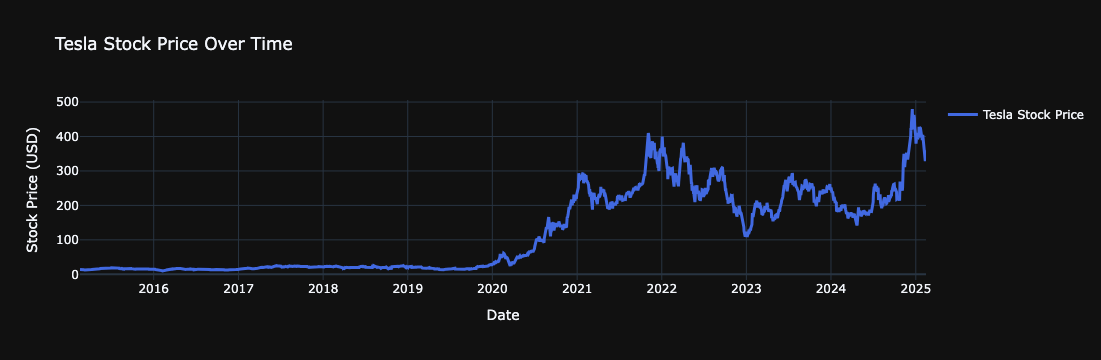

In [103]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add trace for historical stock prices
fig.add_trace(go.Scatter(
    x=df['Date'], 
    y=df['Close/Last'], 
    mode='lines',
    name='Tesla Stock Price',
    line=dict(color='royalblue', width=3)
))

# Customize layout
fig.update_layout(
    title="Tesla Stock Price Over Time",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    template="plotly_dark",
    hovermode="x unified",
    showlegend=True
)

# Show interactive chart
fig.show()

**Feature Engineering for Machine Learning**

In [17]:
# Extract relevant features
data = df[['Date', 'Close/Last']]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close/Last']])

# Define function to create sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# Reshape input data for LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1964, 60, 1)
Testing set shape: (492, 60, 1)


**Building the LSTM Model**

In [19]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0349 - val_loss: 0.0014
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0028 - val_loss: 9.5324e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0018 - val_loss: 8.1308e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020 - val_loss: 7.6052e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018 - val_loss: 6.8346e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0018 - val_loss: 7.4259e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 1

**Model Evaluation & Predictions**

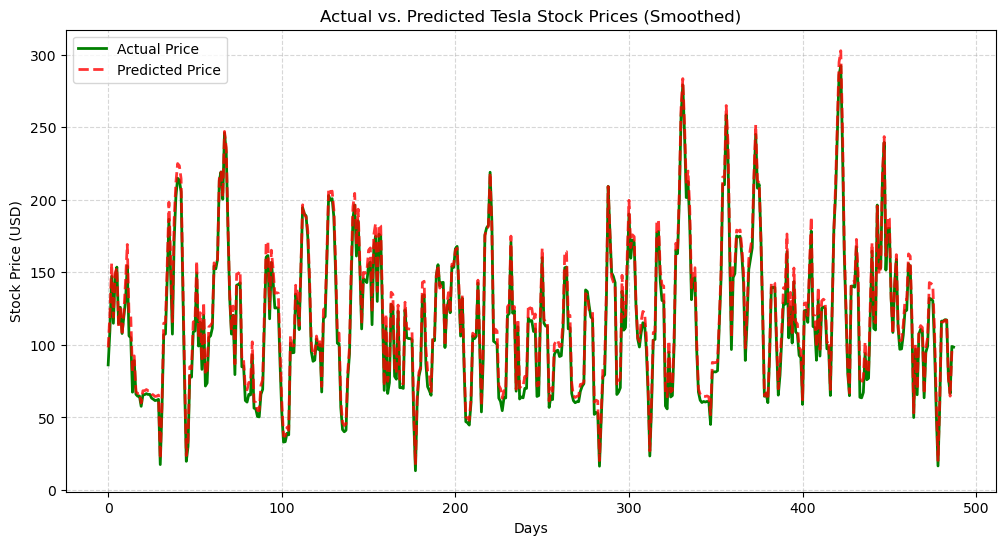

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create a smoother line by taking a moving average
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Apply moving average for smoother visualization
smooth_actual_prices = moving_average(actual_prices.flatten(), window_size=5)
smooth_predicted_prices = moving_average(predicted_prices.flatten(), window_size=5)

# Create x-axis range (align with moving average length)
x_range = np.arange(len(smooth_actual_prices))

# Plot Actual vs. Predicted Stock Prices
plt.figure(figsize=(12,6))
plt.plot(x_range, smooth_actual_prices, label='Actual Price', color='green', linewidth=2)
plt.plot(x_range, smooth_predicted_prices, label='Predicted Price', color='red', linestyle='dashed', linewidth=2, alpha=0.8)

# Aesthetics
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.title('Actual vs. Predicted Tesla Stock Prices (Smoothed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

**Accuracy of the model**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute error metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

# Print accuracy results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R² Score): {r2:.4f}")

Mean Absolute Error (MAE): 7.04
Mean Squared Error (MSE): 96.19
Root Mean Squared Error (RMSE): 9.81
R-Squared (R² Score): 0.9927


**Predicting Future Prices for 2025**

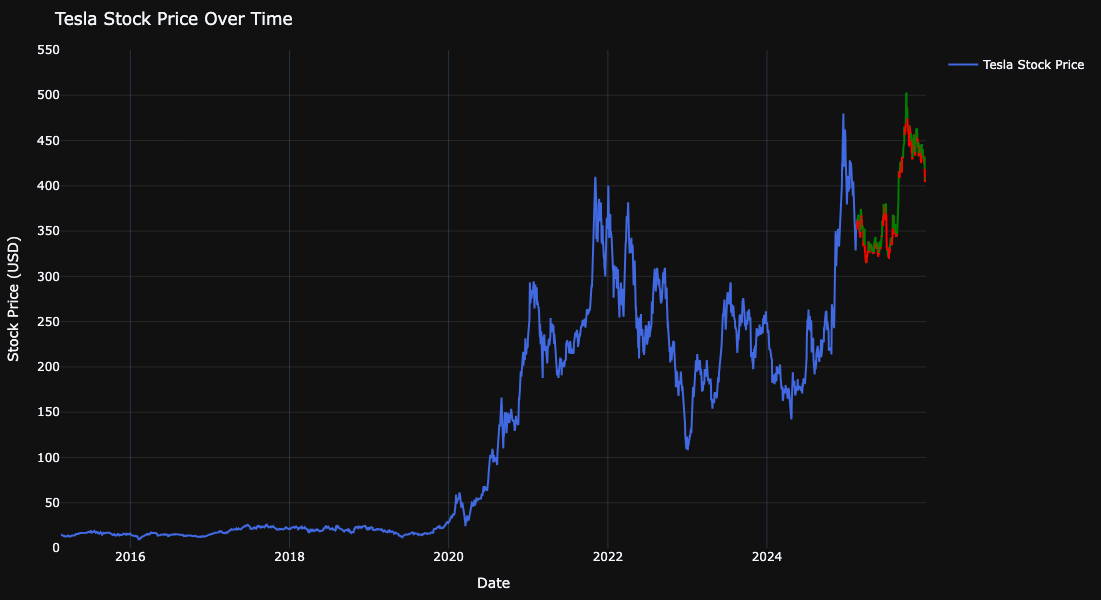

In [98]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Step 1: Load Real Tesla Stock Price Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
    return df

# Step 2: Predict Future Stock Prices
def predict_future_prices(df, end_date):
    start_date = df['Date'].max() + timedelta(days=1)
    future_dates = pd.date_range(start=start_date, end=end_date, freq='B')
    
    np.random.seed(42)
    initial_price = df['Close/Last'].iloc[-1]
    price_series = [initial_price]
    
    for _ in range(len(future_dates)):
        daily_return = np.random.normal(loc=0.001, scale=0.02)
        spike = np.random.choice([0, np.random.normal(0.03, 0.02)], p=[0.95, 0.05])
        new_price = price_series[-1] * (1 + daily_return + spike)
        price_series.append(new_price)
    
    predicted_prices = pd.Series(price_series[1:], index=future_dates)
    return predicted_prices

# Step 3: Create visualization with clean 50-unit intervals
def create_stock_prediction_plot(df, predicted_prices):
    plot_df = pd.concat([df.set_index('Date')['Close/Last'], predicted_prices], axis=0)
    fig = go.Figure()
    
    # Historical prices
    fig.add_trace(go.Scatter(
        x=plot_df.index[:len(df)],
        y=plot_df.values[:len(df)],
        mode='lines',
        name='Tesla Stock Price',
        line=dict(color='royalblue', width=2)
    ))
    
    # Predicted Prices with Color Changes
    predicted_values = plot_df.values[len(df):]
    predicted_dates = plot_df.index[len(df):]
    colors = ['green' if predicted_values[i] >= predicted_values[i-1] else 'red' 
              for i in range(1, len(predicted_values))]
    colors.insert(0, 'green')
    
    for i in range(len(predicted_dates)-1):
        fig.add_trace(go.Scatter(
            x=predicted_dates[i:i+2],
            y=predicted_values[i:i+2],
            mode='lines',
            line=dict(color=colors[i], width=2),
            showlegend=False
        ))
    
    # Calculate y-axis range with clean 50-unit intervals
    all_values = np.concatenate([plot_df.values[:len(df)], predicted_values])
    min_price = 0  # Start from 0
    max_price = np.ceil(max(all_values) / 50) * 50  # Round up to nearest 50
    
    fig.update_layout(
        title="Tesla Stock Price Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        template="plotly_dark",
        hovermode="x unified",
        showlegend=True,
        height=600,
        width=1200,
        margin=dict(l=50, r=50, t=50, b=50),
        yaxis=dict(
            range=[min_price, max_price],
            tickmode='linear',
            tick0=0,
            dtick=50,  # Set ticks every 50 units
            autorange=False,
            gridwidth=1,
            gridcolor='rgba(128, 128, 128, 0.2)',
            zeroline=False
        )
    )
    return fig

# Step 4: Main function
def main():
    file_path = "/Users/sreevarshansathiyamurthy/Downloads/HistoricalData_1739813801084.csv"
    df = load_data(file_path)
    end_date = datetime(2025, 12, 31)
    predicted_prices = predict_future_prices(df, end_date)
    fig = create_stock_prediction_plot(df, predicted_prices)
    fig.show()

if __name__ == "__main__":
    main()